## POSTTEST 5 KB
* NAMA : NUR YAHYA
* NIM : 2109106073

### Multiple Linear Regression

In [1]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('all_perth_house.csv')
df

ADDRESS           SUBURB    PRICE  BEDROOMS  BATHROOMS  \
0           1 Acorn Place       South Lake   565000         4          2   
1             1 Addis Way            Wandi   365000         3          2   
2         1 Ainsley Court          Camillo   287000         3          1   
3         1 Albert Street         Bellevue   255000         2          1   
4            1 Aman Place        Lockridge   325000         4          1   
...                   ...              ...      ...       ...        ...   
33651      9C Gold Street  South Fremantle  1040000         4          3   
33652      9C Pycombe Way      Westminster   410000         3          2   
33653      9D Pycombe Way      Westminster   427000         3          2   
33654     9D Shalford Way       Girrawheen   295000         3          1   
33655  9E Margaret Street          Midland   295000         3          1   

       GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
0         2.0        600         160      2003.0     18300   
1         2.0        351         139      2013.0     26900   
2         1.0        719          86      1979.0     22600   
3         2.0        651          59      1953.0     17900   
4         2.0        466         131      1998.0     11200   
...       ...        ...         ...         ...       ...   
33651     2.0        292         245      2013.0     16100   
33652     2.0        228         114         NaN      9600   
33653     2.0        261         112         NaN      9600   
33654     2.0        457          85      1974.0     12600   
33655     2.0        296          95         NaN     16700   

                    NEAREST_STN  NEAREST_STN_DIST  DATE_SOLD  POSTCODE  \
0      Cockburn Central Station              1800  09-2018\r      6164   
1               Kwinana Station              4900  02-2019\r      6167   
2               Challis Station              1900  06-2015\r      6111   
3               Midland Station              3600  07-2018\r      6056   
4            Bassendean Station              2000  11-2016\r      6054   
...                         ...               ...        ...       ...   
33651         Fremantle Station              1500  03-2016\r      6162   
33652          Stirling Station              4600  02-2017\r      6061   
33653          Stirling Station              4600  02-2017\r      6061   
33654           Warwick Station              4400  10-2016\r      6064   
33655           Midland Station              1700  05-2016\r      6056   

        LATITUDE   LONGITUDE                                  NEAREST_SCH  \
0     -32.115900  115.842450                  LAKELAND SENIOR HIGH SCHOOL   
1     -32.193470  115.859554                               ATWELL COLLEGE   
2     -32.120578  115.993579                 KELMSCOTT SENIOR HIGH SCHOOL   
3     -31.900547  116.038009                 SWAN VIEW SENIOR HIGH SCHOOL   
4     -31.885790  115.947780                                KIARA COLLEGE   
...          ...         ...                                          ...   
33651 -32.064580  115.751820                  CHRISTIAN BROTHERS' COLLEGE   
33652 -31.867055  115.841403  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33653 -31.866890  115.841418  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33654 -31.839680  115.842410                GIRRAWHEEN SENIOR HIGH SCHOOL   
33655 -31.882163  116.014755                             LA SALLE COLLEGE   

       NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0              0.828339               NaN  
1              5.524324             129.0  
2              1.649178             113.0  
3              1.571401               NaN  
4              1.514922               NaN  
...                 ...               ...  
33651          1.430350              49.0  
33652          1.679644              35.0  
33653          1.669159              35.0  
33654          0.358494               NaN  
33655          1.055564              53.0  

[33656 rows x 19 

In [2]:
X = df[['LAND_AREA', 'FLOOR_AREA', 'BEDROOMS', 'BATHROOMS']]
Y = df['PRICE']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [3]:
reg = LinearRegression()
reg.fit(X_train, Y_train)

Y_pred = reg.predict(X_test)

In [4]:
prediksi = pd.DataFrame(X_test)
prediksi['HARGA_ASLI'] = Y_test
prediksi['PREDIKSI_HARGA'] = Y_pred

prediksi

LAND_AREA  FLOOR_AREA  BEDROOMS  BATHROOMS  HARGA_ASLI  PREDIKSI_HARGA
4372         590         100         3          1      580000   384028.134598
14280        913         112         3          1      387000   414551.083974
27697        733         258         4          2      785000   823255.878422
30490        350         200         4          2      719000   676264.374353
10378        752         220         4          2     2200000   727073.922809
...          ...         ...       ...        ...         ...             ...
29954        506         205         4          2      965000   688992.014850
18875        600         100         4          2      665000   423244.968027
18636        717         255         5          2     1650000   765504.134803
11177        668         210         4          2      320000   701722.385443
23935        755         225         4          2      600000   739731.945872

[10097 rows x 6 columns]

## PREDIKSI
Table diatas merupakan tabel yang sudah ditambah kolom prediksi harga, dan bisa dilihat, model kurang tepat dalam memprediksi harga. ini bisa diakibatkan oleh dataset yang memang sulit untuk dipelajari, dari fitur-fitur lainnya tidak cukup untuk menjadi patokan penentu harga, dan mungkin ada faktor lain yang mempengaruhi harga perumahan disana

In [13]:
X.shape[1]
X_test.iloc[:, 1]

4372     100
14280    112
27697    258
30490    200
10378    220
        ... 
29954    205
18875    100
18636    255
11177    210
23935    225
Name: FLOOR_AREA, Length: 10097, dtype: int64

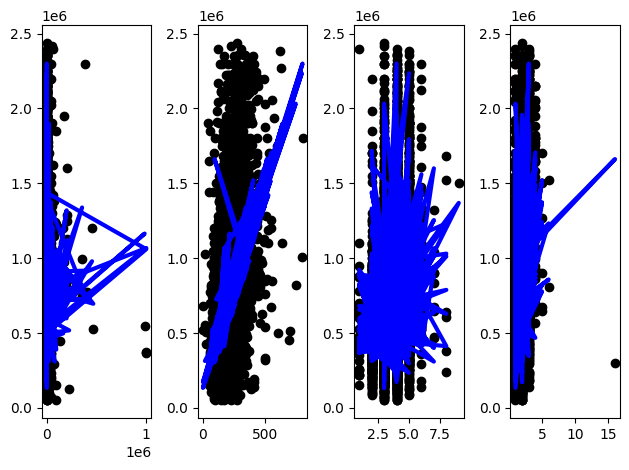

In [19]:
for index in  range(X.shape[1]):
    plt.subplot(1, X.shape[1], index + 1)
    plt.scatter(X_test.iloc[:, index], Y_test, color='black')
    plt.plot(X_test.iloc[:, index], Y_pred, color='blue', linewidth=3)

plt.tight_layout()
plt.show()

### UNSUPERVISED LEARNING

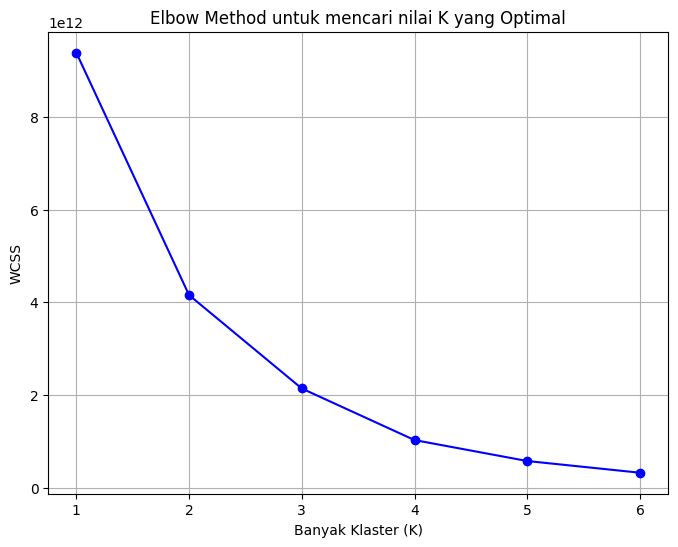

In [37]:
from sklearn.cluster import KMeans
X = df[['FLOOR_AREA', 'LAND_AREA']]
wcss = [] 
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(X)
    wcss.append(model.inertia_)
# Buat grafik Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

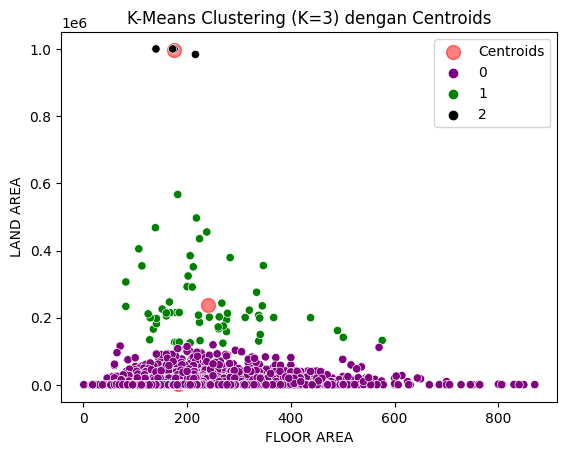

In [38]:
K = 3
kmeans = KMeans(n_clusters=K, n_init=10) # Inisialisasi K-Means
kmeans.fit(X) 
cluster_labels = kmeans.labels_ 
df["cluster"] = cluster_labels 
centroids = kmeans.cluster_centers_ 
warna = ["purple", "green", "black"]
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100,

label='Centroids')

sns.scatterplot(data=df, x="FLOOR_AREA", y="LAND_AREA",

hue="cluster", palette=warna)

plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("FLOOR AREA")
plt.ylabel("LAND AREA")
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
ss_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.98
Davies-Bouldin Index: 0.27
Calinski-Harabasz Index: 56822.28


In [42]:
from sklearn.metrics import adjusted_rand_score # ARI
from sklearn.metrics import normalized_mutual_info_score # NMI
from sklearn.metrics import homogeneity_score, completeness_score,v_measure_score # HCV-M
# Buat crosstab untuk membandingkan cluster labels dengan true labels
cross_tab = pd.crosstab(df["cluster"], df["PRICE"])
print("Cross-Tabulation:")
print(cross_tab, "\n")
# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(df["PRICE"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
# Normalized Mutual Information (NMI)
# Konversi nama pada kolom ‘species’ menjadi numerik
true_labels_num = df["PRICE"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")
# Fungsi HCV-M
homogeneity = homogeneity_score(df["PRICE"], cluster_labels)
completeness = completeness_score(df["PRICE"], cluster_labels)
v_measure = v_measure_score(df["PRICE"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
PRICE    51000    52000    53000    54500    55000    56000    56100    \
cluster                                                                  
0              1        1        1        2        4        1        1   
1              0        0        0        0        0        0        0   
2              0        0        0        0        0        0        0   

PRICE    60000    61000    62000    ...  2385000  2390000  2400000  2401000  \
cluster                             ...                                       
0              4        2        2  ...        1        1       16        1   
1              0        0        0  ...        0        0        1        0   
2              0        0        0  ...        0        0        0        0   

PRICE    2410000  2420000  2425000  2430000  2437000  2440000  
cluster                                                        
0              1        1        5        1        1        1  
1              0       

C:\Users\Yha\AppData\Local\Temp\ipykernel_6888\3736597478.py:9: UserWarning: 
The palette list has fewer values (3) than needed (2297) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(df, x="FLOOR_AREA", y="LAND_AREA", palette=warna,


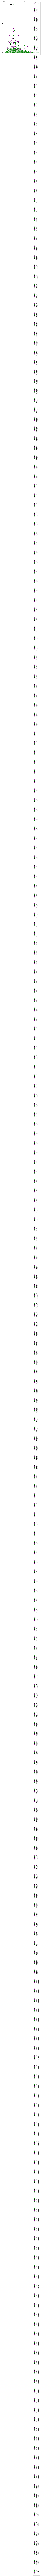

In [49]:
# Karena hasil prediksi memiliki urutan berbeda dengan label aslinya
# Maka harus dilakukan mapping seperti berikut
cluster_mapping = {0: 1, 1: 0, 2: 2} # 0 jadi 1; 1 jadi 0; 2 tetap 2
# Buat kolom baru agar tidak mengganggu kolom hasil prediksi
df["cluster2"] = df["cluster"].map(cluster_mapping)
# Buat sebuah scatter plot untuk data-points label aslinya
plt.figure(figsize=(9,13))
warna = ["purple", "green", "black"]
sns.scatterplot(df, x="FLOOR_AREA", y="LAND_AREA", palette=warna,
hue="PRICE", marker="D", s=130, label="True Labels")

# Tindih data-points tersebut dengan hasil prediksinya
sns.scatterplot(df, x="FLOOR_AREA", y="LAND_AREA", palette=warna,
hue="cluster2", marker="o", s=40, label="Clusters")

plt.title("K-Means Clustering (K=3)")
plt.xlabel("FLOOR AREA")
plt.ylabel("LAND AREA")
plt.legend(title="Legend", loc="upper right")
plt.show()